# Extract the deep frame and use the WCS

In this example you can see how the deep frame of the cube can be extracted from the HDF5 archive and how the WCS can be used.

The deep frame is simply the mean of the interferometric images along the scan axis. The same operation on the spectral cube would give a similar result but the noise would be much more important as each spectral frame has a photon noise ($N_{spectral}$) which is the combined noise of all the interferometric frames ($N_{\text{spectral, frame}} = N_{\text{interf, frame}} \times \sqrt{M}$, M being the number of frames). So that the deep frame made from the spectral cube would have a combined noise equivalent to only one frame of the interferometric cube ($N_{\text{spectral, deep}} = N_{\text{spectral, frame}} / \sqrt{M} = N_{\text{interf, frame}}$, M being the number of frames).

In [1]:
%matplotlib inline
from orcs.process import SpectralCube
import pylab as pl
import orb.utils.io
import numpy as np

In [2]:
cube = SpectralCube('/home/thomas/M57_SN3.merged.cm1.1.0.hdf5')

OSError: File does not exist

## Displaying the deep frame

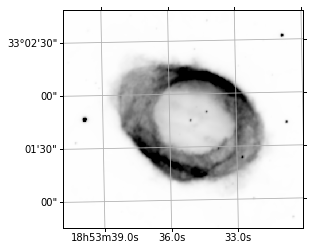

In [4]:
deep_frame = cube.get_deep_frame()
fig = pl.figure()
ax = fig.add_subplot(111, projection=cube.get_wcs())
ax.coords[0].set_major_formatter('hh:mm:ss.s')
ax.coords[1].set_major_formatter('dd:mm:ss')
pl.imshow(deep_frame.T, origin='bottom-left', 
          vmin=np.nanpercentile(deep_frame, 0.1),
          vmax=np.nanpercentile(deep_frame, 99.9),
          cmap='gray_r')
pl.xlim((550,970))
pl.ylim((650,1030))
pl.grid()

## Exporting the deep frame with the WCS

In [5]:
orb.utils.io.write_fits('deep_frame.fits', deep_frame, fits_header=cube.get_wcs_header(), overwrite=True)

INFO| Data written as deep_frame.fits in 1.26 s 


'deep_frame.fits'